In [75]:
output['256']['FC500']['sobol_indices']['Cent']['temp']

{'l2 index': -0.346162294191199,
 'enumerator_l2': -639.338442294742,
 'denominator_l2': 1846.9326469786174,
 'z index': array([ 2.54997698e+07,  2.66589429e+07,  2.77467389e+07,  2.87745006e+07,
         2.97428551e+07,  3.06492530e+07,  3.15107902e+07,  3.23162694e+07,
         3.30742328e+07,  3.37903720e+07,  3.66298022e+08, -1.31965377e+07,
        -9.64359157e+05, -2.12147565e+05, -7.64575878e+04, -1.18944345e+04,
        -2.14747226e+03, -1.49874276e+03, -1.13739397e+03, -1.04839229e+03,
        -9.49383982e+02, -6.28980405e+02, -2.40854027e+02, -1.28612556e+02,
        -1.02969367e+02, -8.64052838e+01, -7.55479234e+01, -7.50282156e+01,
        -7.58994248e+01, -8.70839006e+01, -9.94781236e+01, -1.26570402e+02,
        -1.61771580e+02, -1.93811671e+02, -2.03852591e+02, -1.84473076e+02,
        -1.49809174e+02, -1.15960271e+02, -8.91521571e+01, -6.94177138e+01,
        -5.49183836e+01, -4.67542365e+01, -4.67397239e+01, -4.90105774e+01,
        -5.24701063e+01, -5.71235744e+01, -6

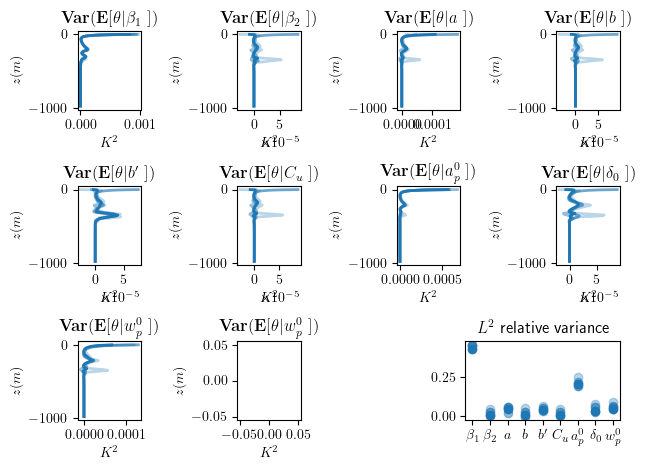

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pickle

plt.rcParams['text.usetex'] = True
# plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'figure.facecolor': 'white'})
plt.rcParams.update({'savefig.facecolor': 'white'})
plt.rcParams.update({'lines.linewidth': 2.0})
# plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

nsamples = ['128','256','512','1024','2048']
# nsamples = ['10', '20','30']
# nsamples = ['512', '1024','2048']
# nsamples=['30','32','64','128','256','512']

cases=['FC500','W005_C500_NO_COR']
case = cases[0] 

output={}
for nsample in nsamples:
    with open('outputs/sobol_FC500_'+nsample, 'rb') as handle:
    # with open('outputs/sobol_'+nsample, 'rb') as handle:
        output[nsample] = pickle.load(handle)

saving_path = 'figures/sensitivity_of_variance_'+case+'.png'

true_name={'Cent': r'$\beta_1$',
            'Cdet': r'$\beta_2$',
            'wp_a': r'$a$',
            'wp_b': r'$b$',
            'wp_bp': r'$b^\prime$',
            'up_c': r'$C_u$',
            'vp_c': r'$C_v$',
            'bc_ap': r'$a_p^0$',
            'delta_bkg': r'$\delta_0$',
            'wp0': r'$w_p^0$' }

#=============== Plot only THETA =====================

alphas = np.linspace(start=0.3,stop=1,num=len(nsamples))

# fig, axs = plt.subplots(nrows=3, ncols=4, sharex=False, constrained_layout=True)

fig=plt.figure()
ax11 = plt.subplot(3,4,1)
ax12 = plt.subplot(3,4,2)
ax13 = plt.subplot(3,4,3)
ax14 = plt.subplot(3,4,4)
ax21 = plt.subplot(3,4,5)
ax22 = plt.subplot(3,4,6)
ax23 = plt.subplot(3,4,7)
ax24 = plt.subplot(3,4,8)
ax31 = plt.subplot(3,4,9)
ax32 = plt.subplot(3,4,10)
ax5  = plt.subplot(3,2,6)
axs=[ax11,ax12,ax13,ax14,ax21,ax22,ax23,ax24,ax31,ax32,ax5]


field = 'temp' 
xmin = -0.0001
xmax = 0.0005
zlim=-300
#====================================
for k,nsample in enumerate(nsamples):
    z_r = output[nsample][case]['z_r']
    for i, parameter in enumerate(output[nsample][case]['sobol_indices']):
        variable_name = true_name[parameter]
        axs[i].plot(output[nsample][case]['sobol_indices'][parameter][field]['enumerator_z'], z_r, color='tab:blue',alpha=alphas[k])
        axs[i].set_ylabel(r'$z(m)$')
        axs[i].set_xlabel(r'$K^2$')
        axs[i].set_title(r'$\mathbf{Var}(\mathbf{E}[\theta |$'+variable_name+' $])$')
        # axs[i].set_xlim((xmin,xmax))
        # axs[i].set_ylim((zlim,0))


ax=axs[-1]
for k,nsample in enumerate(nsamples):
    for parameter in output[nsample][case]['sobol_indices']:
        variable_name = true_name[parameter]
        L2sobolindex=output[nsample][case]['sobol_indices'][parameter][field]['l2 index']
        ax.plot(variable_name, L2sobolindex, 'o', color='tab:blue',  alpha=alphas[k])
    ax.set_title(r'$L^2$ relative variance')
    # ax.set_ylim((0,0.5))
fig.tight_layout()




